# 1.EDA

In [49]:
import pandas as pd
df = pd.read_csv(R"C:\Users\Raiyana Reyaz\OneDrive\Desktop\data science assignments\XGMB AND LGBM ASSIGNMENT\diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
#Missing Values
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.isnull().sum().sum()

np.int64(0)

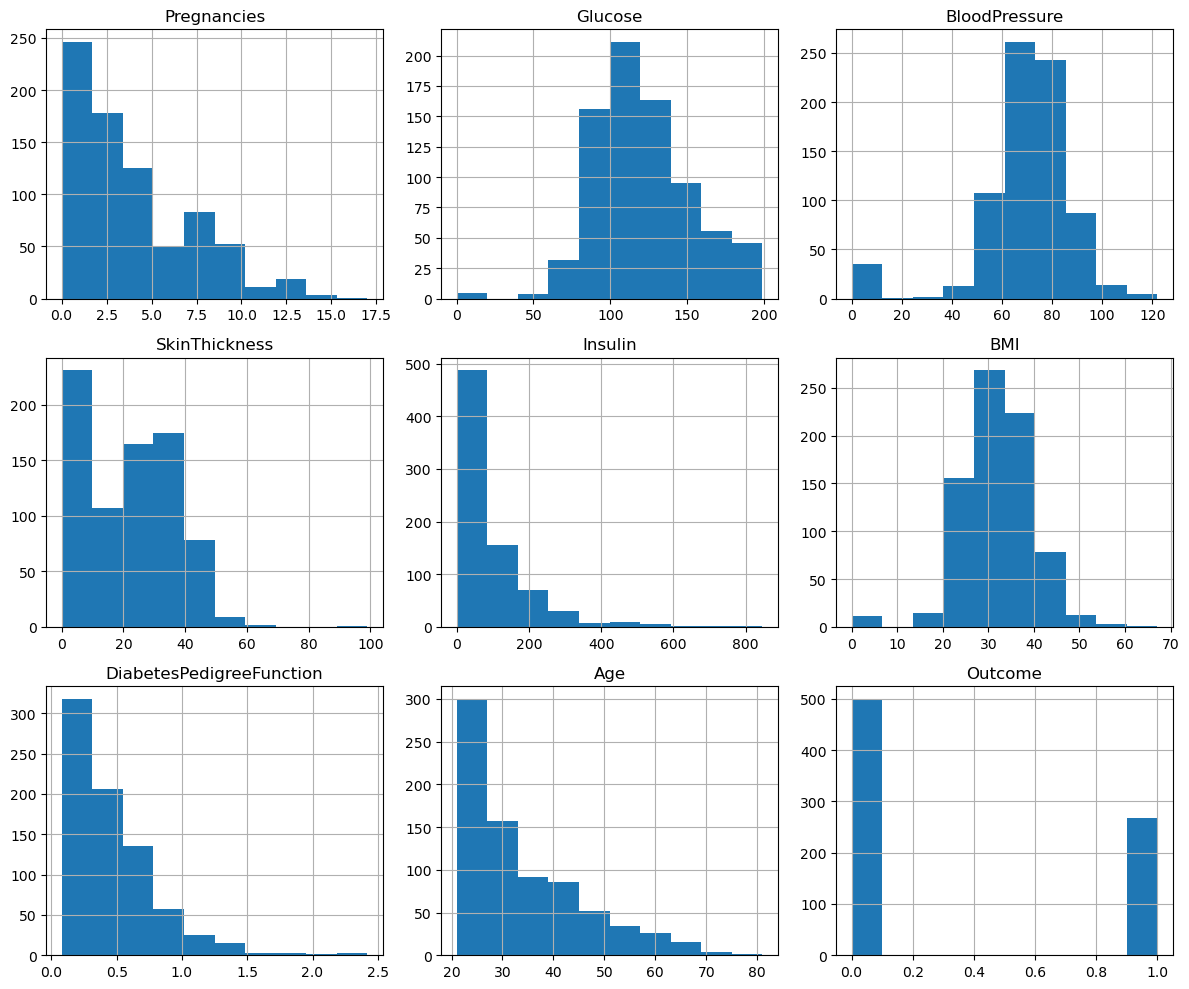

In [6]:
#Histogram for all features

import matplotlib.pyplot as plt

df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

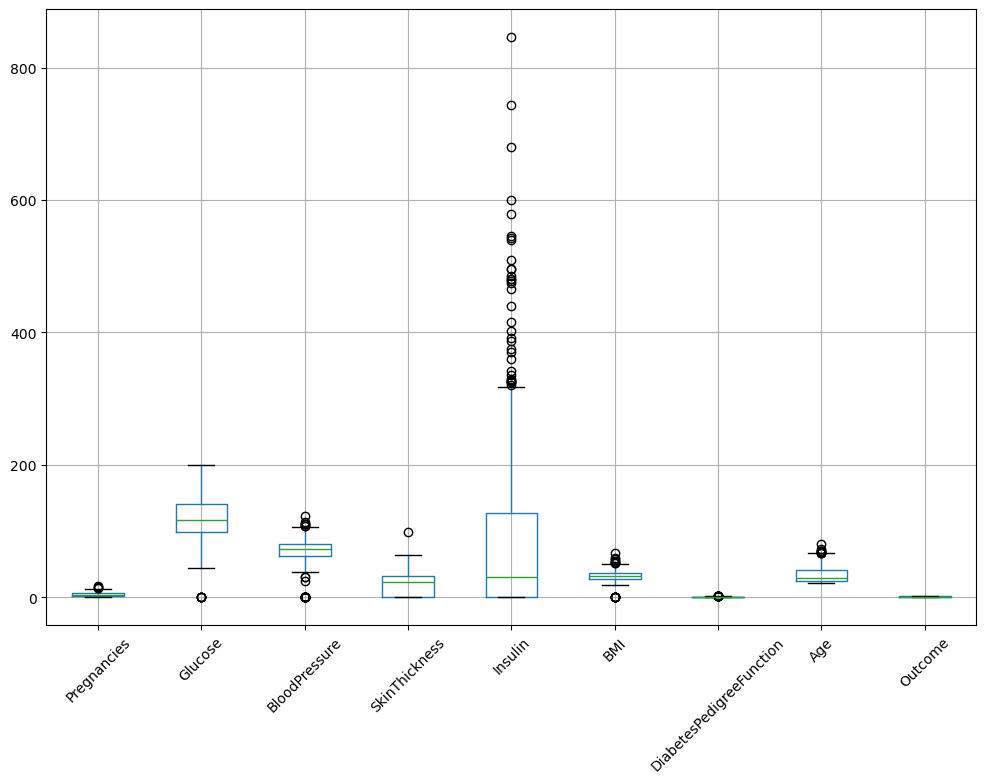

In [7]:
# Boxplots for all features
plt.figure(figsize=(12, 8))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

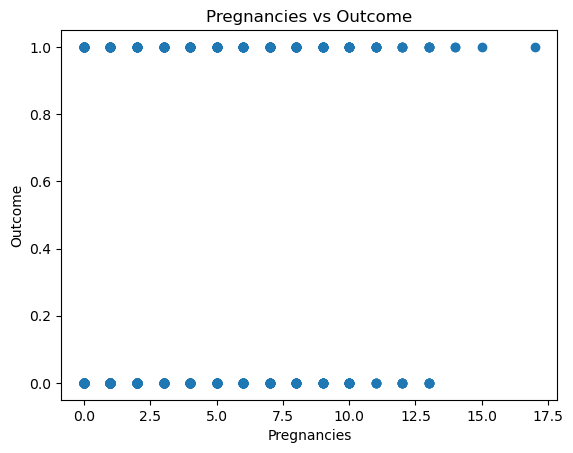

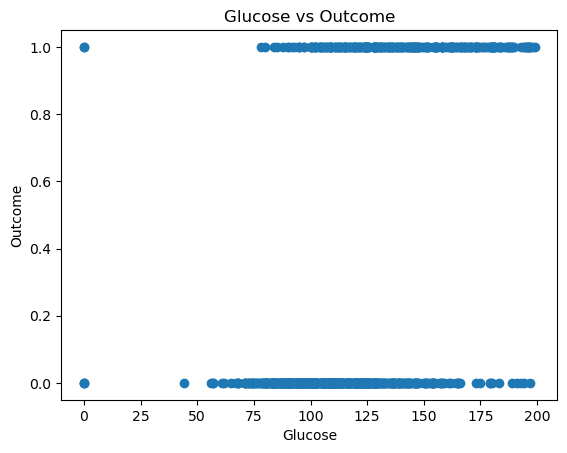

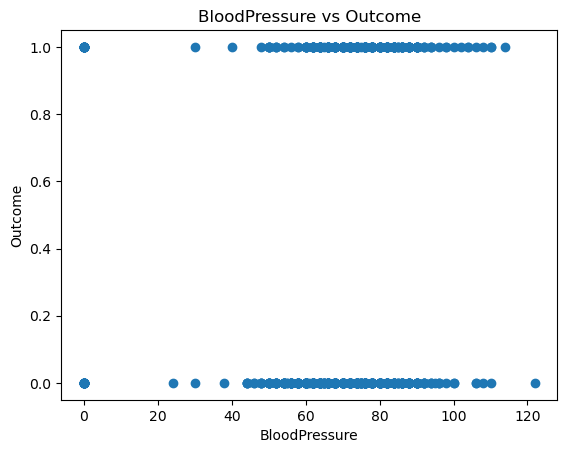

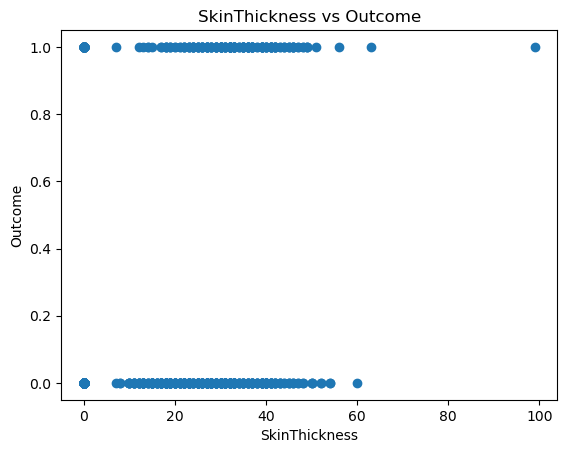

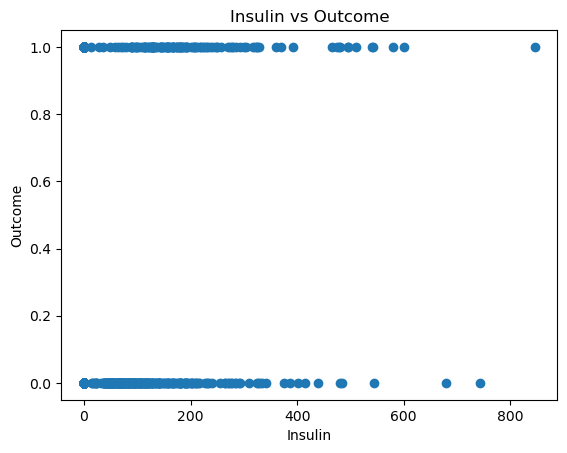

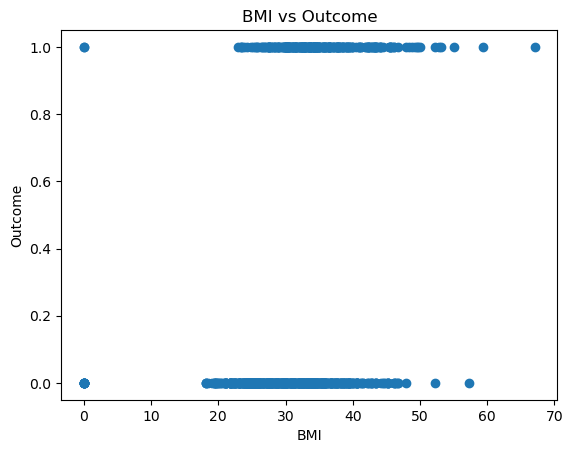

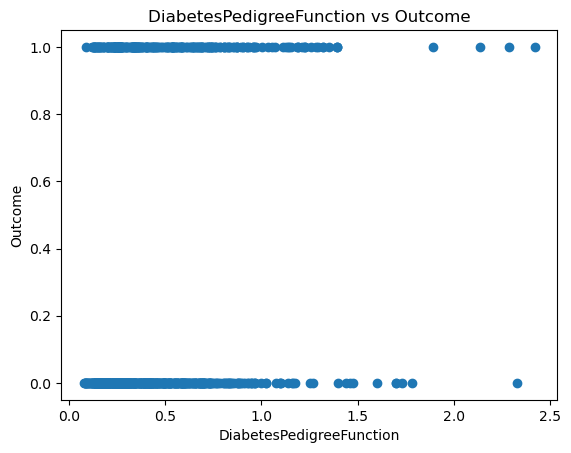

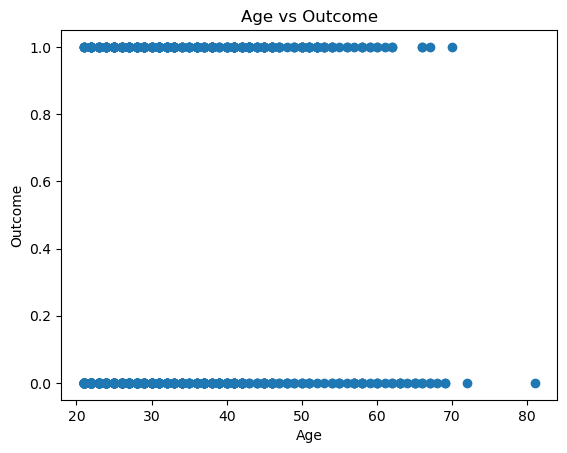

In [8]:
#Visualize relationships between features and outcome (Diabetes)
#Scatter plots (feature vs outcome)
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in features:
    plt.scatter(df[col], df['Outcome'])
    plt.xlabel(col)
    plt.ylabel("Outcome")
    plt.title(f"{col} vs Outcome")
    plt.show()


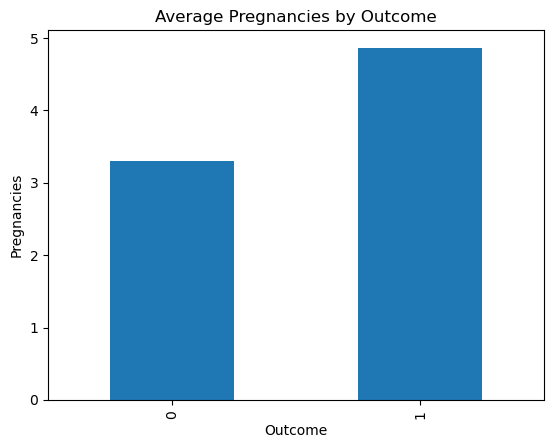

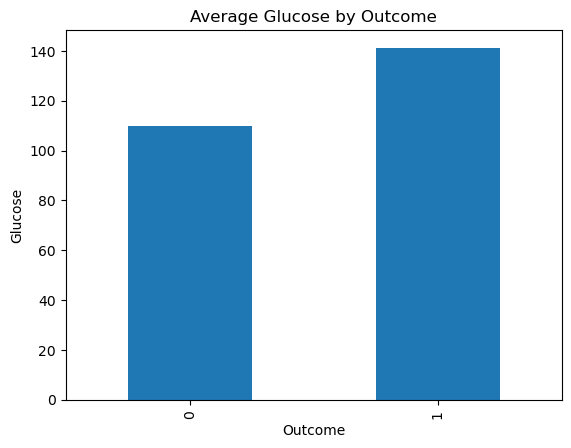

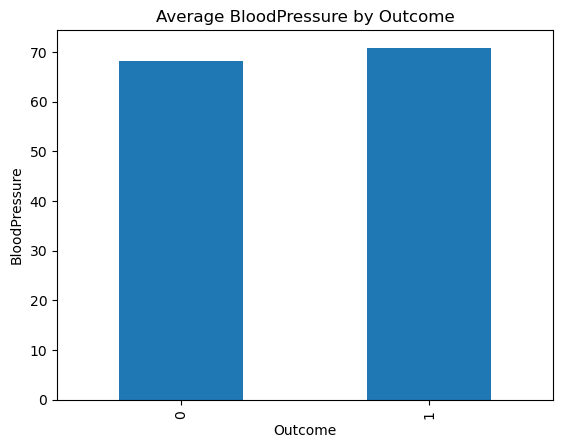

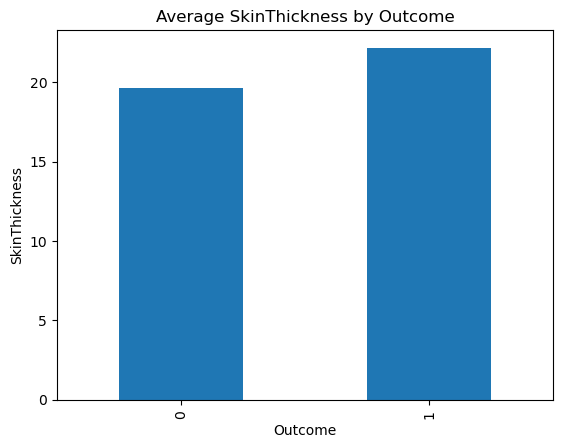

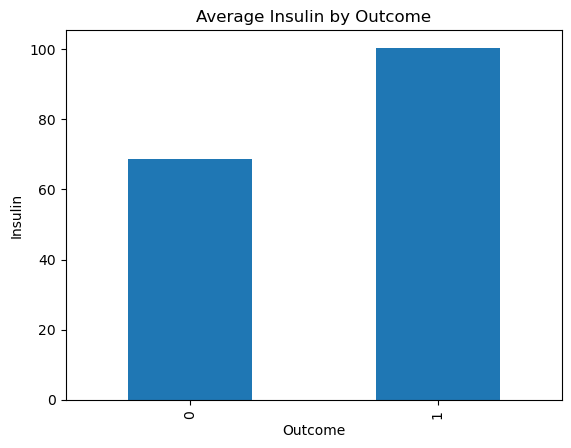

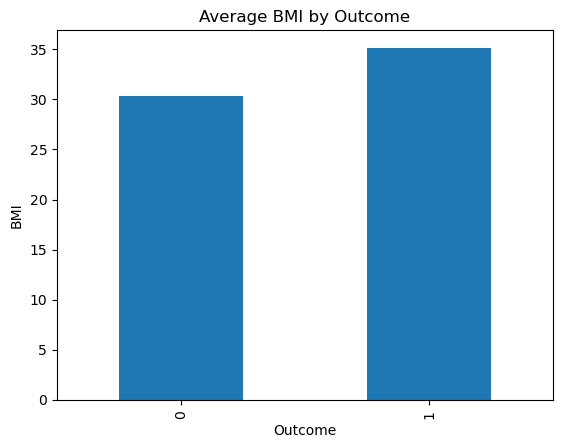

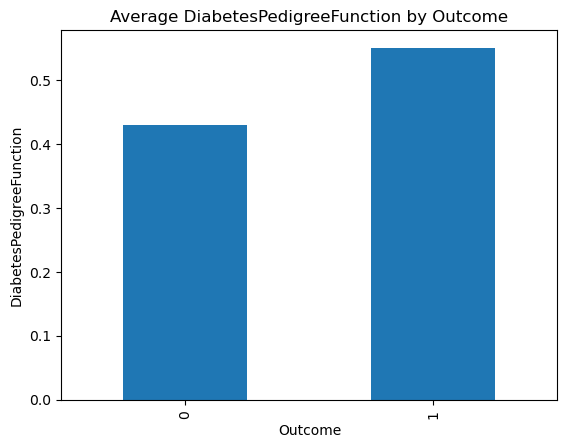

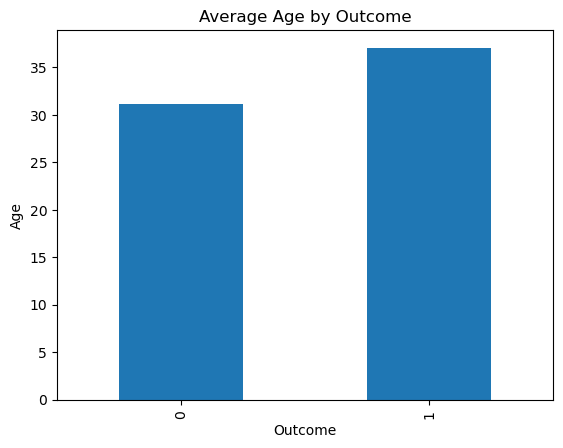

In [9]:
#Bar plot (mean value of feature grouped by outcome)
for col in features:
    df.groupby('Outcome')[col].mean().plot(kind='bar')
    plt.title(f"Average {col} by Outcome")
    plt.ylabel(col)
    plt.show()

# 2. Data Preprocessing:

In [53]:
import numpy as np

cols_with_zero_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero_missing:
    df[col] = df[col].replace(0, np.nan)

# Check how many NaNs after replacement
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [54]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [13]:
#Impute missing values using Median
# Median imputation
df.fillna(df.median(), inplace=True)

In [14]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [55]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [56]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df.drop('Outcome', axis=1))

X = pd.DataFrame(X_scaled, columns=df.columns[:-1])
y = df['Outcome']

# 3.Building Predictive Models:

In [57]:
from sklearn.model_selection import train_test_split

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [58]:
#Full Model Code (LightGBM + XGBoost)
import warnings
warnings.filterwarnings("ignore")
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# -------------------------------------
# LightGBM Model
# -------------------------------------
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(random_state=42)

In [59]:
y_pred_lgbm = lgbm.predict(X_test)
y_predprob_lgbm = lgbm.predict_proba(X_test)[:, 1]

print("----- LightGBM Performance -----")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Precision:", precision_score(y_test, y_pred_lgbm))
print("Recall:", recall_score(y_test, y_pred_lgbm))
print("F1 Score:", f1_score(y_test, y_pred_lgbm))
print("ROC-AUC:", roc_auc_score(y_test, y_predprob_lgbm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))



----- LightGBM Performance -----
Accuracy: 0.7402597402597403
Precision: 0.6458333333333334
Recall: 0.5740740740740741
F1 Score: 0.6078431372549019
ROC-AUC: 0.8120370370370371

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       100
           1       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154



In [60]:
# -------------------------------------
# XGBoost Model
# -------------------------------------
xgb = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_predprob_xgb = xgb.predict_proba(X_test)[:, 1]


In [61]:
print("----- XGBoost Performance -----")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_predprob_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

----- XGBoost Performance -----
Accuracy: 0.7337662337662337
Precision: 0.6274509803921569
Recall: 0.5925925925925926
F1 Score: 0.6095238095238096
ROC-AUC: 0.8105555555555556

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.63      0.59      0.61        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [62]:
#Cross-Validation 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation
lgbm_cv = cross_val_score(lgbm, X, y, cv=5, scoring='f1')

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [66]:
#Hyperparameter Tuning

#LightGBM — RandomizedSearchCV (faster, best for boosting algorithms)

from sklearn.model_selection import RandomizedSearchCV

lgbm_params = {
    'num_leaves': [20, 31, 40, 50],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [-1, 5, 10, 15]
}

lgbm_search = RandomizedSearchCV(
    LGBMClassifier(random_state=42),
    lgbm_params,
    n_iter=15,
    scoring='f1',
    cv=5,
    random_state=42,
    verbose=1
)



In [63]:
print("LightGBM CV F1 Scores:", lgbm_cv)
print("Mean F1:", lgbm_cv.mean())

LightGBM CV F1 Scores: [0.59615385 0.6        0.55670103 0.71153846 0.58585859]
Mean F1: 0.6100503848957457


In [64]:
xgb_cv = cross_val_score(xgb, X, y, cv=5, scoring='f1')

In [65]:
print("XGBoost CV F1 Scores:", xgb_cv)
print("Mean F1:", xgb_cv.mean())

XGBoost CV F1 Scores: [0.59615385 0.57142857 0.6        0.69387755 0.6       ]
Mean F1: 0.6122919937205651


In [67]:
lgbm_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_iter=15,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [-1, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 500],
                                        'num_leaves': [20, 31, 40, 50]},
                   random_state=42, scoring='f1', verbose=1)

In [68]:
print("Best LightGBM Params:", lgbm_search.best_params_)
print("Best LightGBM F1 Score:", lgbm_search.best_score_)

Best LightGBM Params: {'num_leaves': 50, 'n_estimators': 500, 'max_depth': -1, 'learning_rate': 0.01}
Best LightGBM F1 Score: 0.6291860033565427


In [69]:
#XGBoost — GridSearchCV (more controlled tuning)

from sklearn.model_selection import GridSearchCV

xgb_params = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 1.0]
}

xgb_search = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False),
    xgb_params,
    scoring='f1',
    cv=5,
    verbose=1
)

In [70]:
xgb_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='f1', verbose=1)

In [72]:
print("Best XGBoost Params:", xgb_search.best_params_)
print("Best XGBoost F1 Score:", xgb_search.best_score_)

Best XGBoost Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best XGBoost F1 Score: 0.6529776561787506


# 4. Comparative Analysis:
- Both LightGBM and XGBoost show similar performance on the base model.
LightGBM has slightly better accuracy, precision, and ROC–AUC, while XGBoost performs marginally better in recall and F1-score.
Overall, LightGBM performs slightly better, but the difference between the two models is very small.
- XGBoost is slightly more stable across different folds, while LightGBM sometimes performs very well but also dips in some folds.
- Both algorithms improved with tuning.XGBoost improved more (0.61 → 0.65), showing that it benefits more from tuning.LightGBM improved but still remained slightly lower.

Overall Strengths and Weaknesses (Final Summary)
1. LightGBM – Strengths
- Good accuracy and ROC-AUC in the base model.
- Faster training (in general).
- Performs very well on some folds (highest fold ~0.71).
2. LightGBM – Weaknesses
- Performance fluctuates more across CV folds → less stable.
- Even after tuning, its F1 is lower than XGBoost.

3. XGBoost – Strengths
- More stable and consistent across CV folds.
- Best F1 improves the most after tuning.
- Gives the highest overall F1 (0.653) among all models.

4. XGBoost – Weaknesses
- Slightly slower to train.
- Base model recall & precision were not very high before tuning.